<a href="https://colab.research.google.com/github/keulreobeu/deep_learning_for_the_life_sciences/blob/main/%EB%B6%84%EC%9E%90_%EC%88%98%EC%A4%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분자 수준 데이터 다루기

* 분자 피처화(molecular featurization): 분자 구조 데이터를 벡터로 변환
    *   화학 표현자 벡터
    *   2차원 그래프
    *   3차원 정전기적 그리드
    *   오비탈 궤도 기반 함수 등
*   분자 그래프
    *   분자는 구조가 매우 중요한데 그 중 3차원 구조에서 원자배치가 매우 중요하다 이를 분자구조라 한다
*   분자 카이랄성
    *   거울상의 분자 구조들을 말한다. 이성질체
    *   이성질체는 화학반응을 통해 합성된 물질에서 많이 발생한다. 이러한 이성질체는 구조는 비슷하나 효과가 전혀 다르고 독성을 띄는 경우도 많다.

# 분자 데이터 피처화
*   SMILE 문자열과 RDKit
    *   SMILE(Simplified Molecular Input Line Entry System): 분자의 화학식을 분자열로 나타내는 방식중 하나.
    *   RDKit: SMILE를 다루기 위한 라이브러리, 문자열을 분자 그래프 및 다양한 방식의 표현으로 변환하기 위한 역할을 한다.
    *   화학 지문: 분자의 특성 유무를 1과 0으로 나타낸 벡터.
    *   확장 연결 지문(Extended-Connectivity FingerPrint, ECFP): 화학 지문의 몇가지 유용한 특성을 결합한 피처화 방법
        *   머신러닝을 사용시 동일한 크기의 벡터를 사용해야 함으로 서로 다른 크기의 벡터를 같은 크기로 변환해준다. 또한 비슷한 백터값을 많이 가질수록 분자가 유사하다고 간주할 수 있다. 계산도 빠르다.
        *   일반적으로 사용되는 알고리즘은 ECFP4
        *   하지만 확장 연결 지문은 일부 정보가 손실된다는 문제가 있다.
    *   분자 표현자: 분배 계수, 극성 표면적 같은 계산 값
        *   분자의 일반적인 특성에 의존하는 것을 예측할때 주로 사용
        *   원자의 상세한 배열에 의존하는 특성을 예측하는데는 효과적이지 못함
*   그래프 합성곱
    *   피쳐화를 머신러닝 모델이 스스로 만든 피쳐화
    *   분자의 사진에 원소, 전하, 혼성화 등의 화학적 성질을 포함하여 합성곱을 계산하여 피쳐화를 한다
    *   합성곱(GraphConvModel), 위브 모델(WeaveModel), 메시지 전달 신경망(MPNModel), 딥 텐서 신경망(DTNModel)등이 있다
    *   분자 그래프로만 계산을 수행하여 분자구조에 대한 정보가 사라져 분자구조와 연관된 특성을 알기 어렵다.
    *   그로인해 단백질과 같은 거대 분자에는 적합하지 않다.

---

#용해도 예측 모델

In [ ]:
!pip install -U pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install --pre deepchem

런타임 재시작 후 다시실행


In [ ]:
!pip install rdkit

In [ ]:
import deepchem as dc
from rdkit import Chem
import numpy as np
import pandas as pd

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
!pip install "keras<3" "tensorflow<2.16"

In [ ]:
from deepchem.models import GraphConvModel

In [ ]:
tasks, dataset, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = dataset

In [ ]:
model = GraphConvModel(n_tasks=1, mode='regression', dropout=0.2)
model.fit(train_dataset, nb_epoch=100)

0.109276704788208

In [ ]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print(model.evaluate(train_dataset, [metric], transformers))
print(model.evaluate(test_dataset, [metric], transformers))

{'pearson_r2_score': 0.929473218210296}
{'pearson_r2_score': 0.6941252526853812}


In [ ]:
# 교재 오타
'''
smiles = [
    'COC(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C',
    'CCOC(=O)CC',
    'CSc1nc(NC(C)C)nc(NC(C)C)n1',
    'CC(C#C)N(C)C(=O)Nc1ccc(C1)cc1',
    'Cc1cc2ccccc2cc1C'
]
'''

In [ ]:
# GPT 코드 오류 확인
# 하지만 SMILES에 오타가 있지 않을까 싶어 확인하니 교재 오타로 인한 오류
'''
# 1) 유효 SMILES만 남기기
valid_smiles = []
for s in smiles:
    m = Chem.MolFromSmiles(s)
    if m is not None:
        valid_smiles.append(s)

# 2) ConvMol로 피처화 (numpy object 배열 -> 파이썬 리스트로 변환)
featurizer = dc.feat.ConvMolFeaturizer()
X_obj_array = featurizer.featurize(valid_smiles)  # dtype=object numpy array of ConvMol
X_list = X_obj_array.tolist()                     # <- 중요: 파이썬 리스트로

# 3-A) 바로 배치 예측
pred_batch = model.predict_on_batch(X_list)       # OK

# (또는)
# 3-B) Dataset 만들어 predict (더 일반적)
import numpy as np
dummy_y = np.zeros((len(X_list), 1), dtype=float) # 회귀 1-task 예시
dataset = dc.data.NumpyDataset(X=X_list, y=dummy_y)
pred = model.predict(dataset)
'''

'\n# 1) 유효 SMILES만 남기기\nvalid_smiles = []\nfor s in smiles:\n    m = Chem.MolFromSmiles(s)\n    if m is not None:\n        valid_smiles.append(s)\n\n# 2) ConvMol로 피처화 (numpy object 배열 -> 파이썬 리스트로 변환)\nfeaturizer = dc.feat.ConvMolFeaturizer()\nX_obj_array = featurizer.featurize(valid_smiles)  # dtype=object numpy array of ConvMol\nX_list = X_obj_array.tolist()                     # <- 중요: 파이썬 리스트로\n\n# 3-A) 바로 배치 예측\npred_batch = model.predict_on_batch(X_list)       # OK\n\n# (또는)\n# 3-B) Dataset 만들어 predict (더 일반적)\nimport numpy as np\ndummy_y = np.zeros((len(X_list), 1), dtype=float) # 회귀 1-task 예시\ndataset = dc.data.NumpyDataset(X=X_list, y=dummy_y)\npred = model.predict(dataset)\n'

In [ ]:
smiles = [
    'COC(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C',
    'CCOC(=O)CC',
    'CSc1nc(NC(C)C)nc(NC(C)C)n1',
    'CC(C#C)N(C)C(=O)Nc1ccc(C)cc1',
    'Cc1cc2ccccc2cc1C'
]

In [ ]:
mols = [Chem.MolFromSmiles(s) for s in smiles]
featurizer = dc.feat.ConvMolFeaturizer()
x = featurizer.featurize(mols)

[05:59:12] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[05:59:12] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[05:59:12] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[05:59:12] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[05:59:12] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[05:59:12] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[05:59:12] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[05:59:12] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[05:59:12] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[05:59:12] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[05:59:12] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[05:59:12] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[05:59:12] DEPRECATION WARNING: please use GetValence(getExplicit=False)
[05:59:12] DEPRECATION WARNING: please use GetValen

In [ ]:
predicted_solubility = model.predict_on_batch(x)

In [ ]:
print(predicted_solubility[:5])

[[-0.4332351]
 [ 1.6712149]
 [-0.0224819]
 [ 0.2993381]
 [-0.855441 ]]


# SMARTS 문자열
주로 사용 할때
*   분자 데이터베이스에서 특정 구조를 포함하는 분자를 검색
*   공통된 구조를 가진 분자들의 집합을 정렬해 시각화
*   그림에서 하위 구조를 강조
*   특정 구졸르 제외한 계산 값이 필요할 때

SMARTS는 정규표현식과 비슷한 목적으로 만들어 졌다.

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

# 특정 분자들을 그리기
smiles_list = ["CCCCC", "CCOCC","CCNCC","CCSCC"]
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
img = MolsToGridImage(mol_list, molsPerRow=2, subImgSize=(200,200))

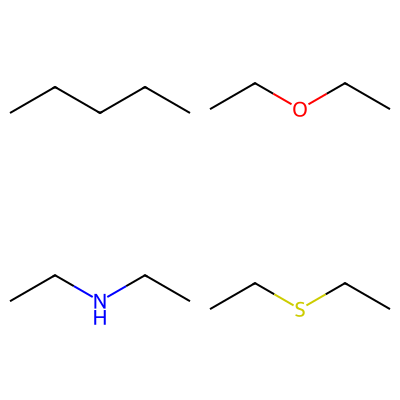

In [ ]:
img

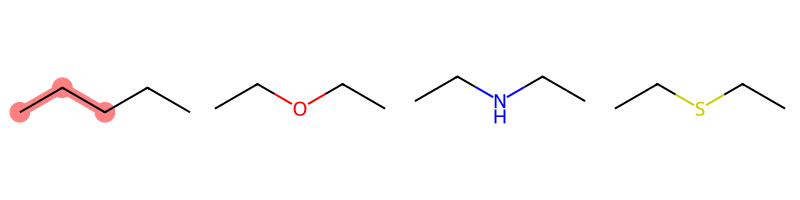

In [ ]:
# 교재 예문
## GetSubstructMatch()와 GetSubstructMatches() 두가지 존재, GetSubstructMatch()는 맨 처음 한개만 반환, GetSubstructMatches()는 모든 값을 찾아 튜플로 반환
query = Chem.MolFromSmarts("CCC")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4, highlightAtomLists=match_list)

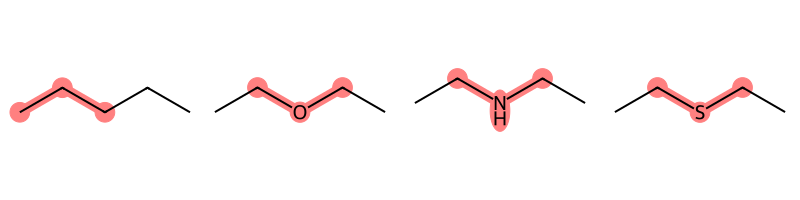

In [ ]:
# C와 C 사이 원자가 있는 집합을 찾을 수 있음
query = Chem.MolFromSmarts("C*C")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4, highlightAtomLists=match_list)

#4장의 추가 학습 세션 by [GPT](https://chatgpt.com/share/68c913ff-e548-8001-9c4d-5530ab54a8fb)


# 🎓 GCN(Graph Convolutional Network) 학습 세션

## 📘 4장 개요 – 분자 표현과 그래프 신경망(GNN)

### 1. 학습 목표
- 분자 구조를 **그래프**로 표현하는 이유와 방법 이해  
- **Graph Convolutional Network(GCN)**의 핵심 아이디어와 수식 파악  
- 분자 독성 예측(Tox21) 데이터셋을 예로 들어 간단한 GCN 모델 구현  

### 2. 실생활·생명과학 응용 사례
- 신약 개발: 후보 물질의 독성, 활성 예측  
- 단백질-리간드 상호작용 예측  
- 화합물 특성(용해도, 친수성 등) 예측  

### 3. 필요한 선행지식
- 분자생물학: 화학 결합·분자 구조식(C, N, O 등 원자 기호와 결합)  
- 파이썬: 함수·클래스·리스트·딕셔너리  
- 수학: 행렬 곱셈, 합성 함수, 기본 확률 통계  

---

## 🧠 개념: GCN 정의
**GCN(Graph Convolutional Network)**는 **그래프 구조 데이터**에서 노드의 특징을 이웃의 정보로 업데이트하여 더 풍부한 표현을 학습하는 **신경망**입니다.

### 메시지 패싱 관점
1. **메시지 계산**: 이웃 노드로부터 정보를 가져옴  
2. **집계(AGGREGATE)**: 이웃의 정보를 평균/합산  
3. **업데이트(UPDATE)**: 자신의 특징과 결합해 새로운 특징 생성  

---

## GCN 핵심 수식

$$
H^{(l+1)} = \sigma\!\left(\tilde{D}^{-1/2}\tilde{A}\tilde{D}^{-1/2} \, H^{(l)} \, W^{(l)} + b^{(l)}\right)
$$

- $\tilde{A} = A + I$: Self-loop 추가  
- $\tilde{D}$: 차수 행렬  
- $H^{(l)}$: $l$층의 노드 특징  
- $W^{(l)}$: 가중치  
- $\sigma$: 활성화 함수 (예: ReLU)


---

## 🔬 코드 예제: 최소 GCN 레이어

### 설치
```bash
pip install torch numpy networkx matplotlib


##GCN 레이어 구현

In [ ]:
import torch
import torch.nn as nn

class GCNLayer(nn.Module):
    def __init__(self, in_dim, out_dim, bias=True):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_dim, out_dim) * 0.01)
        self.bias = nn.Parameter(torch.zeros(out_dim)) if bias else None

    def forward(self, X, A):
        I = torch.eye(A.size(0), device=A.device)
        A_tilde = A + I
        D_tilde_inv_sqrt = torch.diag(torch.pow(A_tilde.sum(dim=1), -0.5))
        A_hat = D_tilde_inv_sqrt @ A_tilde @ D_tilde_inv_sqrt

        out = A_hat @ X @ self.weight
        if self.bias is not None:
            out = out + self.bias
        return out

# 테스트 그래프
A = torch.tensor([
    [0,1,0,0],
    [1,0,1,0],
    [0,1,0,1],
    [0,0,1,0]
], dtype=torch.float32)

X = torch.tensor([
    [1.0, 0.5],
    [0.3, 0.2],
    [0.0, 1.0],
    [0.8, 0.1]
], dtype=torch.float32)

gcn = GCNLayer(2, 3)
H1 = torch.relu(gcn(X, A))
print(H1)
